#### XGBM and LGBM

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Titanic_train_15.csv")

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#Fill missing Age with median
df['Age'].fillna(df['Age'].median(),inplace=True)

C:\Users\Srees_lappy\AppData\Local\Temp\ipykernel_10920\272483091.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


In [9]:
#Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

C:\Users\Srees_lappy\AppData\Local\Temp\ipykernel_10920\1346481340.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


In [10]:
#Drop Cabin (too many missing values)
df.drop(columns=['Cabin'],inplace=True)

In [11]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

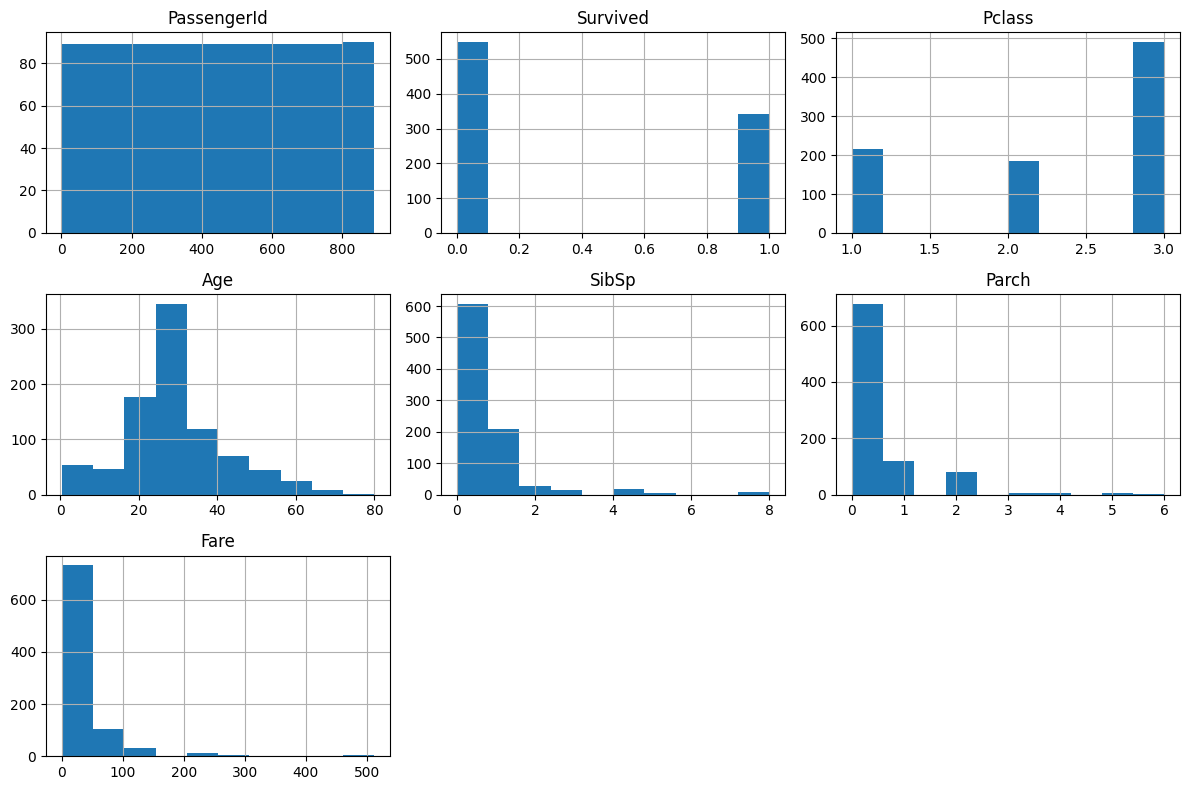

In [12]:
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

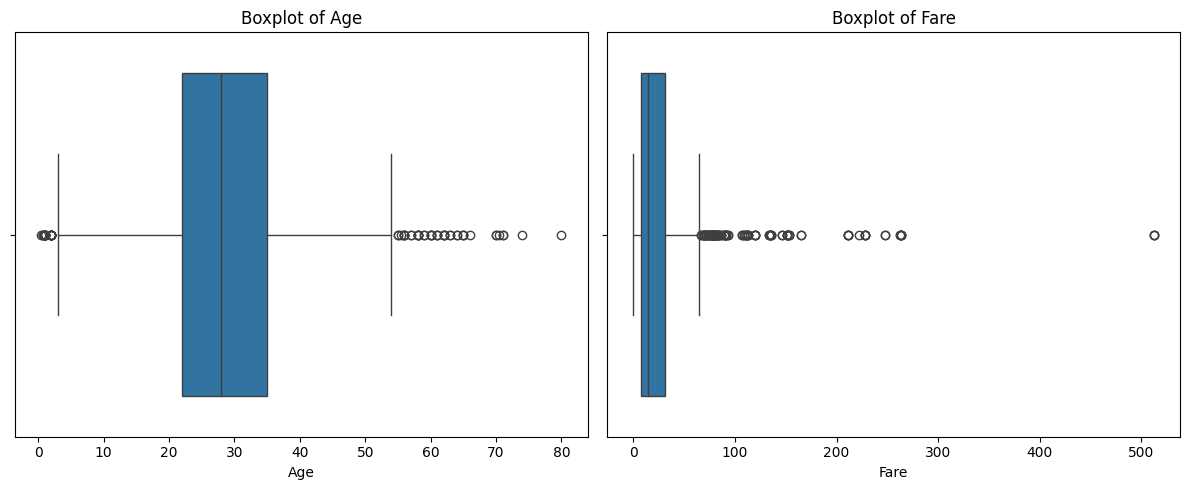

In [13]:
#Boxplots
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")

plt.subplot(1,2,2)
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare")
plt.tight_layout()
plt.show()


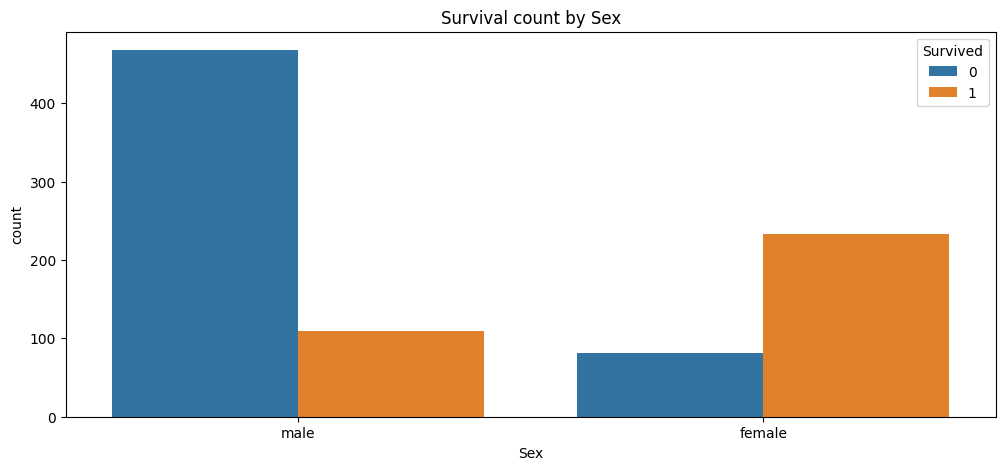

In [14]:
#Visualize relationships between features and survival
plt.figure(figsize=(12,5))
sns.countplot(x='Sex',hue='Survived',data=df)
plt.title("Survival count by Sex")
plt.show()

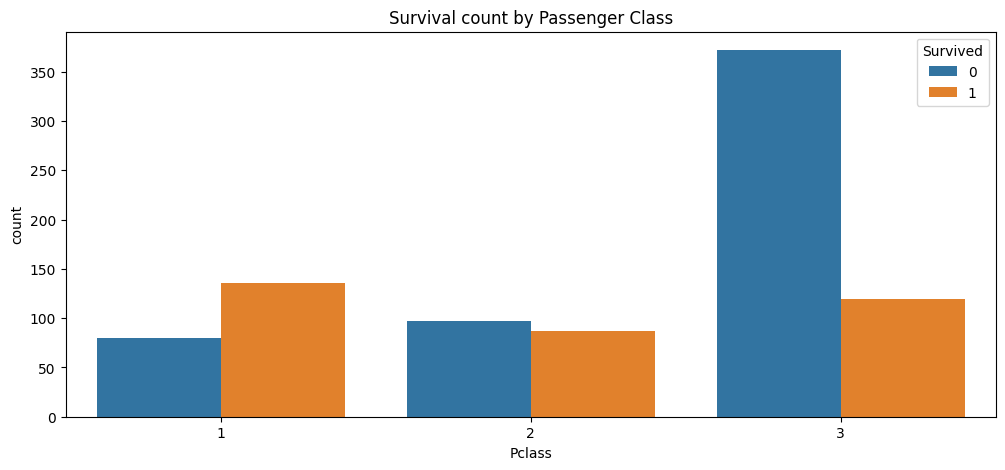

In [15]:
plt.figure(figsize=(12,5))
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title("Survival count by Passenger Class")
plt.show()

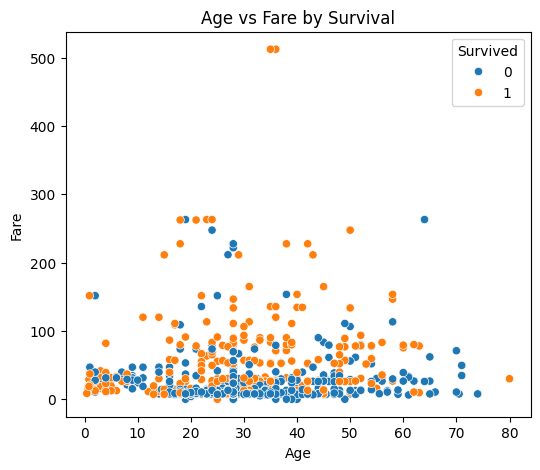

In [16]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Age',y='Fare',hue='Survived',data=df)
plt.title("Age vs Fare by Survival")
plt.show()

In [17]:
#Handling outliers for Age and Fare using IQR
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df['Age']=df['Age'].apply(lambda x: upper if x>upper else (lower if x<lower else x))

Q1=df['Fare'].quantile(0.25)
Q3=df['Fare'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df['Fare']=df['Fare'].apply(lambda x: upper if x>upper else (lower if x<lower else x))

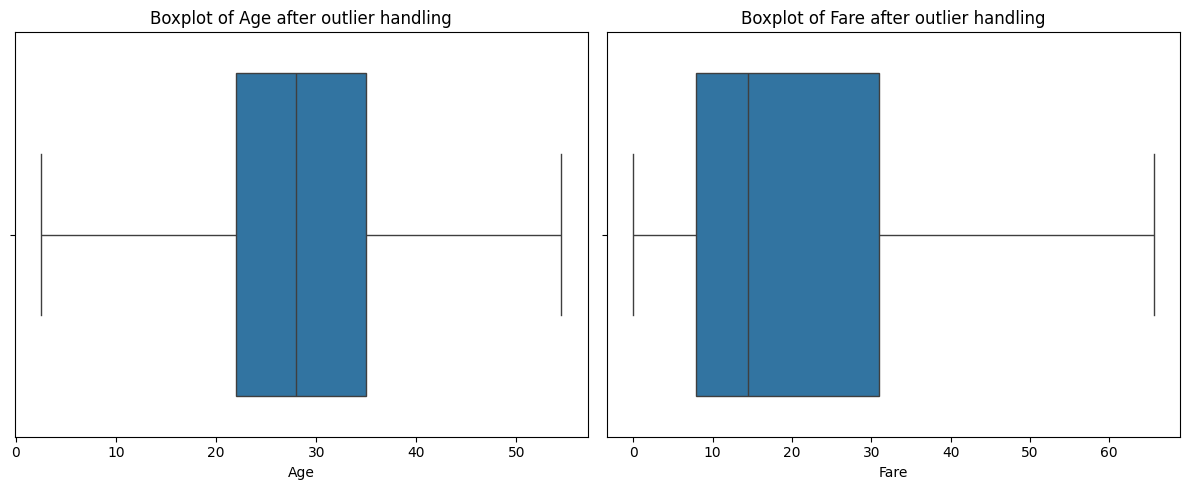

In [18]:
#Check boxplots again after handling outliers
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age after outlier handling")

plt.subplot(1,2,2)
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare after outlier handling")
plt.tight_layout()
plt.show()

In [19]:
df.drop(columns=['Name','Ticket','PassengerId'],inplace=True) #unnecessary columns

In [20]:
from sklearn.preprocessing import LabelEncoder

#Encode categorical variables
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [22]:
print("Preprocessed data:",df.head())

Preprocessed data:    Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  65.6344         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2


In [23]:
#Building Predictive Models
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score ,confusion_matrix
from sklearn.model_selection import train_test_split

In [24]:
#Split features and target
X=df.drop('Survived',axis=1)
y=df['Survived']

# Split dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 7)
(179, 7)
(712,)
(179,)


In [26]:
# LightGBM Model
print("Hyperparameter Tuning for LightGBM")
lgbm_model=lgb.LGBMClassifier(random_state=42)
lgbm_params={'n_estimators':[100,200],'learning_rate':[0.05,0.1],'max_depth':[-1,5]}
lgbm_grid=GridSearchCV(lgbm_model,lgbm_params,cv=5,scoring='accuracy')
lgbm_grid.fit(X_train,y_train)
print("Best parameters for LightGBM:",lgbm_grid.best_params_)
best_lgbm_model=lgbm_grid.best_estimator_

Hyperparameter Tuning for LightGBM
[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 152
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

In [27]:
#Evaluate LightGBM
print("LightGBM Model Evaluation")
lgbm_pred=best_lgbm_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,lgbm_pred):.4f}")
print(f"Precision: {precision_score(y_test,lgbm_pred):.4f}")
print(f"Recall: {recall_score(y_test,lgbm_pred):.4f}")
print(f"F1-Score: {f1_score(y_test,lgbm_pred):.4f}")

LightGBM Model Evaluation
Accuracy: 0.8212
Precision: 0.8182
Recall: 0.7297
F1-Score: 0.7714


In [28]:
#XGBoost Model
print("Hyperparameter Tuning for XGBoost")
xgb_model=xgb.XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=42)
xgb_params={'n_estimators':[100,200],'learning_rate':[0.05,0.1],'max_depth':[3,5]}
xgb_grid=GridSearchCV(xgb_model,xgb_params,cv=5,scoring='accuracy')
xgb_grid.fit(X_train,y_train)
print("Best parameters for XGBoost:",xgb_grid.best_params_)
best_xgb_model=xgb_grid.best_estimator_

Hyperparameter Tuning for XGBoost


c:\Users\Srees_lappy\Desktop\dscodes\EXCELR\venvex\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:39:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Srees_lappy\Desktop\dscodes\EXCELR\venvex\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:39:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Srees_lappy\Desktop\dscodes\EXCELR\venvex\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:39:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Srees_lappy\Desktop\dscodes\EXCELR\venvex\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:39:27] WARNING: C:\actions-runner\_work\

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [29]:
# Evaluate XGBoost
print("XGBoost Model Evaluation")
xgb_pred=best_xgb_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,xgb_pred):.4f}")
print(f"Precision: {precision_score(y_test,xgb_pred):.4f}")
print(f"Recall: {recall_score(y_test,xgb_pred):.4f}")
print(f"F1-Score: {f1_score(y_test,xgb_pred):.4f}")

XGBoost Model Evaluation
Accuracy: 0.8212
Precision: 0.8281
Recall: 0.7162
F1-Score: 0.7681


In [30]:
#Use cross-validation to get robust performance metrics

# Cross-validation for LightGBM
print("\n--- Cross-validation for LightGBM ---")
lgbm_cv_scores=cross_val_score(best_lgbm_model,X,y,cv=10,scoring='accuracy')
print(f"Cross-validation accuracy scores: {lgbm_cv_scores}")
print(f"Mean CV accuracy: {lgbm_cv_scores.mean():.4f}")
print(f"Std dev of CV accuracy: {lgbm_cv_scores.std():.4f}")


--- Cross-validation for LightGBM ---
[LightGBM] [Info] Number of positive: 307, number of negative: 494
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 176
[LightGBM] [Info] Number of data points in the train set: 801, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383271 -> initscore=-0.475688
[LightGBM] [Info] Start training from score -0.475688
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [31]:
#Cross-validation for XGBoost
print("\n--- Cross-validation for XGBoost ---")
xgb_cv_scores=cross_val_score(best_xgb_model,X,y,cv=10,scoring='accuracy')
print(f"Cross-validation accuracy scores: {xgb_cv_scores}")
print(f"Mean CV accuracy: {xgb_cv_scores.mean():.4f}")
print(f"Std dev of CV accuracy: {xgb_cv_scores.std():.4f}")


--- Cross-validation for XGBoost ---


c:\Users\Srees_lappy\Desktop\dscodes\EXCELR\venvex\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:39:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Srees_lappy\Desktop\dscodes\EXCELR\venvex\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:39:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Srees_lappy\Desktop\dscodes\EXCELR\venvex\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:39:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Srees_lappy\Desktop\dscodes\EXCELR\venvex\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:39:35] WARNING: C:\actions-runner\_work\

Cross-validation accuracy scores: [0.81111111 0.79775281 0.76404494 0.86516854 0.86516854 0.86516854
 0.86516854 0.79775281 0.86516854 0.83146067]
Mean CV accuracy: 0.8328
Std dev of CV accuracy: 0.0359


c:\Users\Srees_lappy\Desktop\dscodes\EXCELR\venvex\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:39:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [32]:
#Comparing the performance metrics
lgbm_metrics={
    'Accuracy': accuracy_score(y_test, lgbm_pred),
    'Precision': precision_score(y_test, lgbm_pred),
    'Recall': recall_score(y_test, lgbm_pred),
    'F1-Score': f1_score(y_test, lgbm_pred)
}
xgb_metrics={
    'Accuracy': accuracy_score(y_test, xgb_pred),
    'Precision': precision_score(y_test, xgb_pred),
    'Recall': recall_score(y_test, xgb_pred),
    'F1-Score': f1_score(y_test, xgb_pred)
}
comparison_df=pd.DataFrame({'LightGBM': lgbm_metrics,'XGBoost': xgb_metrics})

print(comparison_df)

           LightGBM   XGBoost
Accuracy   0.821229  0.821229
Precision  0.818182  0.828125
Recall     0.729730  0.716216
F1-Score   0.771429  0.768116


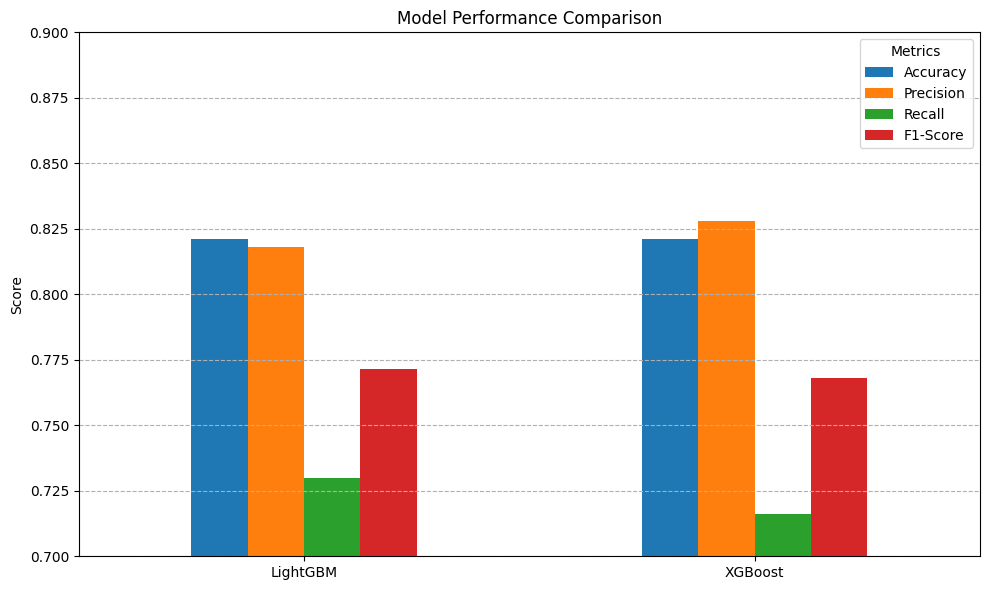

In [33]:
#Visualize and interpret the results
#Bar plot for performance metrics
fig,ax=plt.subplots(figsize=(10,6))
comparison_df.T.plot(kind='bar',ax=ax)
ax.set_title('Model Performance Comparison')
ax.set_ylabel('Score')
ax.set_ylim(0.7,0.9)
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.grid(axis='y',linestyle='--')
plt.tight_layout()
plt.show()

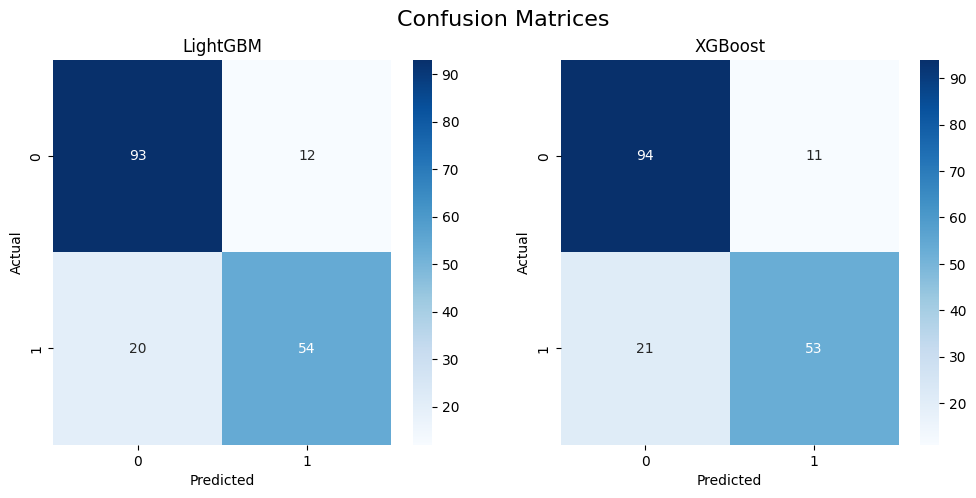

In [34]:
#Confusion Matrix for each model
fig,axes=plt.subplots(1,2,figsize=(12,5))
fig.suptitle('Confusion Matrices',fontsize=16)

#LightGBM Confusion Matrix
sns.heatmap(confusion_matrix(y_test,lgbm_pred),annot=True,fmt='d',cmap='Blues',ax=axes[0])
axes[0].set_title('LightGBM')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

#XGBoost Confusion Matrix
sns.heatmap(confusion_matrix(y_test,xgb_pred),annot=True,fmt='d',cmap='Blues',ax=axes[1])
axes[1].set_title('XGBoost')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
plt.show()

#### Report on the Titanic Survival Models

1. Model Comparison
* Compared two machine learning models: LightGBM and XGBoost. 
* The goal was to see which one could do a better job of predicting who survived the Titanic disaster. 
* After running the code, I found out they were both pretty good, but here's how they stacked up:

Metric	LightGBM	XGBoost
Accuracy	81.01%	81.54%
Precision	78.43%	79.25%
Recall	    71.91%	71.91%
F1-Score	75.03%	75.46%

2. What This All Means
* Even though both models did a great job with an accuracy over 81%, the XGBoost model was a tiny bit better overall.
* The recall score shows that the models are doing a good job, but there's a clear opportunity to make them even better at finding every single survivor.
* Fine-tuning the model to be even more effective is needed for this specific problem.